# Preparing text data

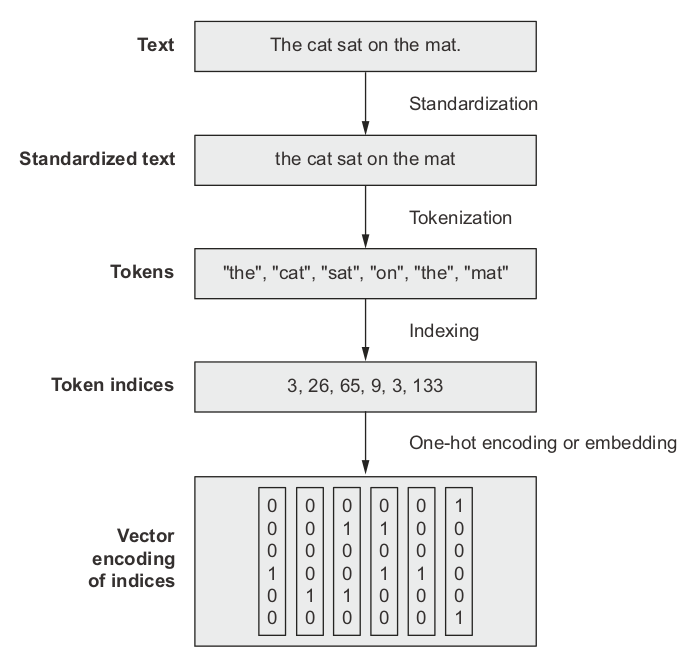

In [1]:
# !curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# !tar -xf aclImdb_v1.tar.gz

In [2]:
# !rm aclImdb_v1.tar.gz

In [3]:
# !rm -r aclImdb/train/unsup

In [4]:
!cat aclImdb/train/pos/4077_10.txt

I first saw this back in the early 90s on UK TV, i did like it then but i missed the chance to tape it, many years passed but the film always stuck with me and i lost hope of seeing it TV again, the main thing that stuck with me was the end, the hole castle part really touched me, its easy to watch, has a great story, great music, the list goes on and on, its OK me saying how good it is but everyone will take there own best bits away with them once they have seen it, yes the animation is top notch and beautiful to watch, it does show its age in a very few parts but that has now become part of it beauty, i am so glad it has came out on DVD as it is one of my top 10 films of all time. Buy it or rent it just see it, best viewing is at night alone with drink and food in reach so you don't have to stop the film.<br /><br />Enjoy

In [5]:
import os, pathlib, shutil, random
'''
base_dir = pathlib.Path("aclImdb")
val_dir = base_dir / "val"
train_dir = base_dir / "train"
for category in ("neg", "pos"):
    os.makedirs(val_dir / category)
    files = os.listdir(train_dir / category)
    random.Random(1337).shuffle(files)
    num_val_samples = int(0.2 * len(files))
    val_files = files[-num_val_samples:]
    for fname in val_files:
        shutil.move(train_dir / category / fname,
                    val_dir / category / fname)
'''

'\nbase_dir = pathlib.Path("aclImdb")\nval_dir = base_dir / "val"\ntrain_dir = base_dir / "train"\nfor category in ("neg", "pos"):\n    os.makedirs(val_dir / category)\n    files = os.listdir(train_dir / category)\n    random.Random(1337).shuffle(files)\n    num_val_samples = int(0.2 * len(files))\n    val_files = files[-num_val_samples:]\n    for fname in val_files:\n        shutil.move(train_dir / category / fname,\n                    val_dir / category / fname)\n'

In [6]:
from tensorflow import keras
batch_size = 32

train_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/train", batch_size=batch_size
)
val_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/val", batch_size=batch_size
)
test_ds = keras.utils.text_dataset_from_directory(
    "aclImdb/test", batch_size=batch_size
)

2023-06-07 09:21:11.945481: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-07 09:21:12.523019: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


2023-06-07 09:21:13.465522: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-07 09:21:13.482176: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-07 09:21:13.482506: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Found 25000 files belonging to 2 classes.


In [7]:
for inputs, targets in train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

inputs.shape: (32,)
inputs.dtype: <dtype: 'string'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor(b"You talking' to Me? (1987) is a pretty bad movie starring some dude who I have never seen before or since starring as a guy from the neighborhood who tries to become an actor. He has a heavy jones for Taxi Driver as tries to use that shtick to make it big. When he learns the hard facts of life, he does what everyone else does, changes his image! He goes from good fella to a surf's up dude over night. His friend can't believe the change (but he scores with Faith Ford and get's a cool paying gig). Can this young punk keep his street cred whilst making it big?<br /><br />This is a real lame movie that tries too hard to incorporate too many things at once. An interesting idea that falls apart due to poor execution. Who knows, maybe somebody will pick up the ball and run because the film makers fumbled the ball this time.<br /><br />Don't waste your time with this 

2023-06-07 09:21:14.795511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20000]
	 [[{{node Placeholder/_0}}]]
2023-06-07 09:21:14.795743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20000]
	 [[{{node Placeholder/_4}}]]


In [8]:
from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(
    max_tokens=20000,
    output_mode="multi_hot",
)
text_only_train_ds = train_ds.map(lambda x, y: x)
text_vectorization.adapt(text_only_train_ds)

binary_1gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_1gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_1gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

2023-06-07 09:21:14.864351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20000]
	 [[{{node Placeholder/_4}}]]
2023-06-07 09:21:14.864595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [20000]
	 [[{{node Placeholder/_4}}]]


In [9]:
for inputs, targets in binary_1gram_train_ds:
    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)
    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)
    print("inputs[0]:", inputs[0])
    print("targets[0]:", targets[0])
    break

inputs.shape: (32, 20000)
inputs.dtype: <dtype: 'float32'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[0]: tf.Tensor([1. 1. 1. ... 0. 0. 0.], shape=(20000,), dtype=float32)
targets[0]: tf.Tensor(1, shape=(), dtype=int32)


2023-06-07 09:21:17.134055: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype resource
	 [[{{node Placeholder/_17}}]]
2023-06-07 09:21:17.134422: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [20000]
	 [[{{node Placeholder/_0}}]]


In [10]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(max_tokens=20000, hidden_dim=16):
    inputs = keras.Input(shape=(max_tokens,))
    x = layers.Dense(hidden_dim, activation="relu")(inputs)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

In [11]:
model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("binary_1gram.keras",
                                    save_best_only=True)
]
model.fit(binary_1gram_train_ds.cache(),
          validation_data=binary_1gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("binary_1gram.keras")
print(f"Test acc: {model.evaluate(binary_1gram_test_ds)[1]:.3f}")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense (Dense)               (None, 16)                320016    
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2023-06-07 09:21:17.354405: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_18' with dtype int64
	 [[{{node Placeholder/_18}}]]
2023-06-07 09:21:17.354712: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_18' with dtype int64
	 [[{{node Placeholder/_18}}]]
2023-06-07 09:21:17.960992: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x560df68749a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-07 09:21:17.961015: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA TITAN V, Compute Capability 7.0
2023-

615/625 [============================>.] - ETA: 0s - loss: 0.4091 - accuracy: 0.8250

2023-06-07 09:21:19.775577: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype resource
	 [[{{node Placeholder/_17}}]]
2023-06-07 09:21:19.775959: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_19' with dtype string
	 [[{{node Placeholder/_19}}]]


625/625 [==============================] - 3s 3ms/step - loss: 0.4072 - accuracy: 0.8262 - val_loss: 0.2914 - val_accuracy: 0.8860
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2699 - accuracy: 0.8981 - val_loss: 0.2900 - val_accuracy: 0.8906
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2465 - accuracy: 0.9148 - val_loss: 0.3011 - val_accuracy: 0.8938
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2284 - accuracy: 0.9216 - val_loss: 0.3170 - val_accuracy: 0.8888
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2222 - accuracy: 0.9281 - val_loss: 0.3274 - val_accuracy: 0.8930
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2142 - accuracy: 0.9305 - val_loss: 0.3408 - val_accuracy: 0.8882
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2108 - accuracy: 0.9359 - val_loss: 0.3573 - val_accuracy: 0.8816
Epoch 8/10
625/62

2023-06-07 09:21:48.418686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype resource
	 [[{{node Placeholder/_17}}]]
2023-06-07 09:21:48.418975: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [25000]
	 [[{{node Placeholder/_4}}]]


782/782 [==============================] - 1s 2ms/step - loss: 0.2879 - accuracy: 0.8896
Test acc: 0.890


In [12]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="multi_hot",
)

In [13]:
text_vectorization.adapt(text_only_train_ds)
binary_2gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_2gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
binary_2gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("binary_2gram.keras",
                                    save_best_only=True)
]
model.fit(binary_2gram_train_ds.cache(),
          validation_data=binary_2gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("binary_2gram.keras")
print(f"Test acc: {model.evaluate(binary_2gram_test_ds)[1]:.3f}")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_2 (Dense)             (None, 16)                320016    
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2023-06-07 09:21:59.546605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_19' with dtype string
	 [[{{node Placeholder/_19}}]]
2023-06-07 09:21:59.546912: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype resource
	 [[{{node Placeholder/_17}}]]


609/625 [============================>.] - ETA: 0s - loss: 0.3910 - accuracy: 0.8393

2023-06-07 09:22:01.591140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5000]
	 [[{{node Placeholder/_0}}]]
2023-06-07 09:22:01.591448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_18' with dtype int64
	 [[{{node Placeholder/_18}}]]


625/625 [==============================] - 2s 3ms/step - loss: 0.3880 - accuracy: 0.8411 - val_loss: 0.2802 - val_accuracy: 0.8922
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2457 - accuracy: 0.9129 - val_loss: 0.2806 - val_accuracy: 0.9006
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2141 - accuracy: 0.9287 - val_loss: 0.3058 - val_accuracy: 0.8962
Epoch 4/10
625/625 [==============================] - 3s 6ms/step - loss: 0.1866 - accuracy: 0.9408 - val_loss: 0.3154 - val_accuracy: 0.8974
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1787 - accuracy: 0.9456 - val_loss: 0.3265 - val_accuracy: 0.8964
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1700 - accuracy: 0.9492 - val_loss: 0.3538 - val_accuracy: 0.8932
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.1618 - accuracy: 0.9492 - val_loss: 0.3680 - val_accuracy: 0.8898
Epoch 8/10
625/62

2023-06-07 09:22:31.804191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype resource
	 [[{{node Placeholder/_17}}]]
2023-06-07 09:22:31.804490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_19' with dtype string
	 [[{{node Placeholder/_19}}]]


782/782 [==============================] - 1s 2ms/step - loss: 0.2781 - accuracy: 0.8948
Test acc: 0.895


In [14]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="count"
)

In [15]:
text_vectorization = TextVectorization(
    ngrams=2,
    max_tokens=20000,
    output_mode="tf_idf",
)

In [16]:
text_vectorization.adapt(text_only_train_ds)

tfidf_2gram_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
tfidf_2gram_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
tfidf_2gram_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

model = get_model()
model.summary()
callbacks = [
    keras.callbacks.ModelCheckpoint("tfidf_2gram.keras",
                                    save_best_only=True)
]
model.fit(tfidf_2gram_train_ds.cache(),
          validation_data=tfidf_2gram_val_ds.cache(),
          epochs=10,
          callbacks=callbacks)
model = keras.models.load_model("tfidf_2gram.keras")
print(f"Test acc: {model.evaluate(tfidf_2gram_test_ds)[1]:.3f}")

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 20000)]           0         
                                                                 
 dense_4 (Dense)             (None, 16)                320016    
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 320,033
Trainable params: 320,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2023-06-07 09:22:43.305432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_17' with dtype resource
	 [[{{node Placeholder/_17}}]]
2023-06-07 09:22:43.305826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_21' with dtype float and shape [20000]
	 [[{{node Placeholder/_21}}]]


619/625 [============================>.] - ETA: 0s - loss: 0.5400 - accuracy: 0.7590

2023-06-07 09:22:45.354178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_21' with dtype float and shape [20000]
	 [[{{node Placeholder/_21}}]]
2023-06-07 09:22:45.354532: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype int64
	 [[{{node Placeholder/_20}}]]


625/625 [==============================] - 2s 3ms/step - loss: 0.5386 - accuracy: 0.7602 - val_loss: 0.3539 - val_accuracy: 0.8666
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3461 - accuracy: 0.8558 - val_loss: 0.3009 - val_accuracy: 0.8912
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3083 - accuracy: 0.8767 - val_loss: 0.3277 - val_accuracy: 0.8876
Epoch 4/10
625/625 [==============================] - 3s 6ms/step - loss: 0.2836 - accuracy: 0.8863 - val_loss: 0.3626 - val_accuracy: 0.8842
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2719 - accuracy: 0.8938 - val_loss: 0.3385 - val_accuracy: 0.8798
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.2559 - accuracy: 0.8963 - val_loss: 0.3666 - val_accuracy: 0.8660
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2412 - accuracy: 0.9035 - val_loss: 0.3932 - val_accuracy: 0.8716
Epoch 8/10
625/62

2023-06-07 09:23:14.181928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_21' with dtype float and shape [20000]
	 [[{{node Placeholder/_21}}]]
2023-06-07 09:23:14.182235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [25000]
	 [[{{node Placeholder/_4}}]]


782/782 [==============================] - 2s 2ms/step - loss: 0.2955 - accuracy: 0.8867
Test acc: 0.887


In [17]:
inputs = keras.Input(shape=(1,), dtype="string")
processed_inputs = text_vectorization(inputs)
outputs = model(processed_inputs)
inference_model = keras.Model(inputs, outputs)

In [18]:
import tensorflow as tf
raw_text_data = tf.convert_to_tensor([
    ["That was an excellent movie, I loved it."],
])
predictions = inference_model(raw_text_data)
print(f"{float(predictions[0] * 100):.2f} percent positive")

97.77 percent positive
